# Drawdown Algorithms Stock Market

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("Ford_Stock.csv",index_col='Date',parse_dates = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


<AxesSubplot:xlabel='Date'>

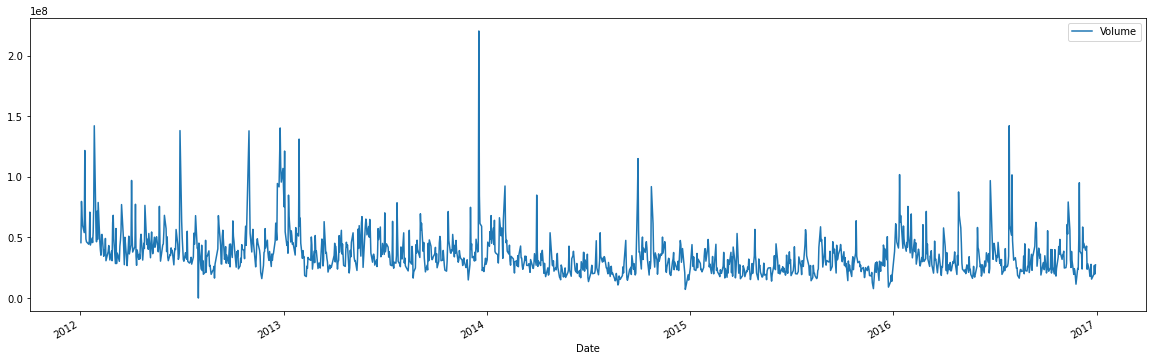

In [19]:
df[['Volume']].plot(figsize=(20,6)) # There is no drawdown... 

In [8]:
vector1 = df[["Volume"]]  # Pick one column in this case (but can pick whole df...)

var_holder = {}
list1 = []
for i in range(len(vector1)):                  # for each row make new df that removes one row and takes the rest
    var_holder['my_var_' + str(i)] = []        # Make a list/tuple that has dynamic variable name that is empyt list with new name.. attaching i to it
    vectorz = vector1.iloc[i:,]                #for each iteration get a subset starting at the iteration row throug the rest of the rows for the vector
    list1.append(vectorz)                      #append the new vector subset list to the list1 list making it a list of different length lists


In [9]:
list1

[              Volume
 Date                
 2012-01-03  45709811
 2012-01-04  79725188
 2012-01-05  67877467
 2012-01-06  59840605
 2012-01-09  53981467
 ...              ...
 2016-12-23  15621178
 2016-12-27  19467440
 2016-12-28  26875381
 2016-12-29  19819081
 2016-12-30  27405736
 
 [1258 rows x 1 columns],
                Volume
 Date                 
 2012-01-04   79725188
 2012-01-05   67877467
 2012-01-06   59840605
 2012-01-09   53981467
 2012-01-10  121750545
 ...               ...
 2016-12-23   15621178
 2016-12-27   19467440
 2016-12-28   26875381
 2016-12-29   19819081
 2016-12-30   27405736
 
 [1257 rows x 1 columns],
                Volume
 Date                 
 2012-01-05   67877467
 2012-01-06   59840605
 2012-01-09   53981467
 2012-01-10  121750545
 2012-01-11   63806007
 ...               ...
 2016-12-23   15621178
 2016-12-27   19467440
 2016-12-28   26875381
 2016-12-29   19819081
 2016-12-30   27405736
 
 [1256 rows x 1 columns],
                Volume
 Date    

In [271]:

# startlist = []
# endlist = []
# percentagelist = []
# dataframeindexlist = []
# for z in range(0,len(list1)):                    # list 1 is a list of lists that takes the df removes one row from top and continues
#     df = pd.DataFrame(list1[z])                  # turn that list into a dataframe
#     print(df)                                     #print
#     minlist=[]
#     percentchnglist=[]
#     for i in range(1,len(df)):                   # for each row of that dataframe minus frist value so you dont get 1 
#         pctchng = (df.iloc[i][0] - df.iloc[0][0])/ df.iloc[i][0]  # This is the actual formula!!!!!!!!!!!!!!!!!! new -old/new
#         print(pctchng)
#         if pctchng < 0:                          # check to see if there was a draw down by see if value (percent change is negative )
#             minx = df.iloc[i][0]                # get min value of the column 
#             minlist.append(minx)                # get a list of values to take minimum from 
#             percentchnglist.append(pctchng)     # get a list of percent changes to get minimum from 
#         else:
#             continue
#         minimumz = min(minlist)                 # find minimum of minlist
#     print(minimumz)
#     indexz = df[df['Volume'] == minx].index     # find time stamp of the minimum index
#     print(indexz[0])
#     start = df.iloc[0][0]                       # find start time volume value
#     start2 = df[df["Volume"] == start].index    # find start index aka the start value off of volume value
#     print(start2[0])
#     print(percentchnglist) # now find smallest m
# #     minindex = min(percentchnglist)
# #     print(minindex)
#     #print(percentchnglist.index(minindex)) 
#     if len(percentchnglist) == 0:              # if the list has a negative percentage change the list will be greater than 0 else continue
#         continue
#     else:
#         minindex = min(percentchnglist)        # get minimum of the percentage list
#         minperc = min(percentchnglist)         # minimum percentage change of the list
#         print(minperc)
#         print(percentchnglist.index(minindex)) #
#         indexerz = percentchnglist.index(minindex) + 1  # you do this because the percentage change starts at the 1st index so you get a list of n-1 for the percent change hence why you index n+1 from origionald df
#         #print(indexerz)
#         print(df.iloc[indexerz].name) # how to get the index of the minimum percentage...\
    
#     startlist.append(start2[0])
#     endlist.append(indexz[0])
#     percentagelist.append(minperc)
#     dataframeindexlist.append(z)
    

In [11]:
dfzz = pd.DataFrame(list(zip(startlist, endlist, percentagelist,dataframeindexlist)), 
               columns =['Start', 'End','Percentage_Drawdown','Dataframe_Index']) 

In [12]:
dfzz


,Start,End,Percentage_Drawdown,Dataframe_Index
0,2012-01-03,2016-12-30,-inf,0
1,2012-01-04,2016-12-30,-inf,1
2,2012-01-05,2016-12-30,-inf,2
3,2012-01-06,2016-12-30,-inf,3
4,2012-01-09,2016-12-30,-inf,4
...,...,...,...,...
1244,2016-12-19,2016-12-29,-0.461478,1249
1245,2016-12-20,2016-12-23,-0.141658,1250
1246,2016-12-21,2016-12-23,-0.159776,1251
1247,2016-12-22,2016-12-30,-0.780984,1252


In [15]:
dfzz.sort_values(by=['Percentage_Drawdown'], inplace=True,ascending=False)

In [16]:
dfzz

,Start,End,Percentage_Drawdown,Dataframe_Index
1245,2016-12-20,2016-12-23,-0.141658,1250
1246,2016-12-21,2016-12-23,-0.159776,1251
998,2015-12-28,2016-11-25,-0.197379,1002
1000,2015-12-30,2016-11-25,-0.206366,1004
1248,2016-12-28,2016-12-29,-0.356036,1255
...,...,...,...,...
6,2012-01-11,2016-12-30,-inf,6
5,2012-01-10,2016-12-30,-inf,5
4,2012-01-09,2016-12-30,-inf,4
3,2012-01-06,2016-12-30,-inf,3


# Another way

In [76]:
df = pd.read_csv("Ford_Stock.csv",index_col='Date',parse_dates = True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [109]:
len(df)

1258

In [77]:
# Get drawdown rage or not drawdown range.. 
df['Pct_Change'] = df['Close'].pct_change()

df['drawdown'] = np.where(df['Pct_Change'] < 0, "Drawdown", "Not Drawdown")
df['Cummax'] = df['Close'].cummax()
df['Cummin'] = df['Close'].cummin()
#df['Cumprod'] = df['Close'].cumprod() # Not usefull...
df['Close 5 Day Ma'] = df['Close'].rolling(window=5).mean()
df['Close 10 Day Ma'] = df['Close'].rolling(window=10).mean()
df['Close 30 Day Ma'] = df['Close'].rolling(window=30).mean()
df['Close 60 Day Ma'] = df['Close'].rolling(window=60).mean()
df['Close 90 Day Ma'] = df['Close'].rolling(window=90).mean()
df['Close 200 Day Ma'] = df['Close'].rolling(window=200).mean()
# Part of larger drawdown
df['Larger Drawdown'] = np.where(df['Close'] < df['Cummax'],"Larger Drawdown",'Nope')
df.head(10)

,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown
Date,,,,,,,,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,NaN,Not Drawdown,11.13,11.13,NaN,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-04,11.15,11.53,11.07,11.30,79725188,0.015274,Not Drawdown,11.30,11.13,NaN,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-05,11.33,11.63,11.24,11.59,67877467,0.025664,Not Drawdown,11.59,11.13,NaN,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-06,11.74,11.80,11.52,11.71,59840605,0.010354,Not Drawdown,11.71,11.13,NaN,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-09,11.83,11.95,11.70,11.80,53981467,0.007686,Not Drawdown,11.80,11.13,11.506,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-10,12.00,12.05,11.63,11.80,121750545,0.000000,Not Drawdown,11.80,11.13,11.640,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-11,11.74,12.18,11.65,12.07,63806007,0.022881,Not Drawdown,12.07,11.13,11.794,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-12,12.16,12.18,11.89,12.14,48687666,0.005800,Not Drawdown,12.14,11.13,11.904,NaN,NaN,NaN,NaN,NaN,Nope
2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.970,NaN,NaN,NaN,NaN,NaN,Larger Drawdown


In [79]:
# Reset index date is column now
df2 = df.reset_index()


In [102]:
# For each row in df2 get the close adn the cummmax and if close is less than cummax then its a drawdown.. store it in list
largerdrawdown = []
innerdrawdown = []
for i in range(0,len(df2)):
    if float(df2.iloc[i][4]) < float(df2.iloc[i][8]):   #(need float because decimal) if close is less than the current cummax its not part of a larger drawdown

        largerdrawdown.append(df2.iloc[i][0])    # dont want timestamp version so get print version... .
    else:
        continue

In [110]:
len(largerdrawdown) # only 42 days that are greaterthan or equal to the cummax
#1258-1216 = 42 yes this algorithm is working the validation is correct....

42

In [95]:
# The subset works now use the whole entire list to get the parts where there is a drawdown...
df2[df2["Date"] == "2012-01-13 00:00:00"]

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.97,NaN,NaN,NaN,NaN,NaN,Larger Drawdown


In [104]:
# Subset for all drawdowns
drawdownlist = df2[df2.Date.isin(largerdrawdown)]

In [105]:
drawdownlist # This is the correct length of the dataset it should be.. 

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.970,NaN,NaN,NaN,NaN,NaN,Larger Drawdown
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,12.014,11.760,NaN,NaN,NaN,NaN,Larger Drawdown
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,12.320,12.112,NaN,NaN,NaN,NaN,Larger Drawdown
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,12.758,12.494,NaN,NaN,NaN,NaN,Larger Drawdown
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,12.682,12.501,NaN,NaN,NaN,NaN,Larger Drawdown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2016-12-23,12.43,12.46,12.36,12.46,15621178,0.004839,Not Drawdown,17.84,8.92,12.588,12.627,12.354333,12.120333,12.188333,12.70195,Larger Drawdown
1254,2016-12-27,12.43,12.51,12.36,12.39,19467440,-0.005618,Drawdown,17.84,8.92,12.534,12.584,12.358000,12.125667,12.189000,12.69755,Larger Drawdown
1255,2016-12-28,12.37,12.45,12.22,12.25,26875381,-0.011299,Drawdown,17.84,8.92,12.428,12.532,12.364333,12.128167,12.187444,12.69265,Larger Drawdown
1256,2016-12-29,12.25,12.31,12.22,12.23,19819081,-0.001633,Drawdown,17.84,8.92,12.346,12.502,12.370667,12.128667,12.186000,12.68630,Larger Drawdown


In [111]:
drawdownlist.to_csv("drawdownlist.csv") # use this to help your aanalytics

In [ ]:
# find larger drawdown groups (close under cummax)
# Filter for draw down (aka the pct_change was negative..) # this gives you all of the percent change days
# count the consecutive days in that draw down (aka if the time difference of i is greater than one day then its a new group)
# then get average by group or somethign 

In [112]:
drawdownlist2 = drawdownlist[drawdownlist["Pct_Change"] < 0]
drawdownlist2.head(20)

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.970,NaN,NaN,NaN,NaN,NaN,Larger Drawdown
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,12.014,11.760,NaN,NaN,NaN,NaN,Larger Drawdown
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,12.320,12.112,NaN,NaN,NaN,NaN,Larger Drawdown
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,12.758,12.494,NaN,NaN,NaN,NaN,Larger Drawdown
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,12.682,12.501,NaN,NaN,NaN,NaN,Larger Drawdown
20,2012-02-01,12.73,12.75,12.29,12.33,71668979,-0.007246,Drawdown,12.93,11.13,12.408,12.565,NaN,NaN,NaN,NaN,Larger Drawdown
21,2012-02-02,12.40,12.43,12.20,12.26,48347559,-0.005677,Drawdown,12.93,11.13,12.302,12.530,NaN,NaN,NaN,NaN,Larger Drawdown
24,2012-02-07,12.93,12.97,12.83,12.88,39413408,-0.006173,Drawdown,12.96,11.13,12.644,12.586,NaN,NaN,NaN,NaN,Larger Drawdown
25,2012-02-08,12.91,12.96,12.80,12.84,35352410,-0.003106,Drawdown,12.96,11.13,12.746,12.577,NaN,NaN,NaN,NaN,Larger Drawdown
26,2012-02-09,12.89,12.90,12.67,12.69,52290479,-0.011682,Drawdown,12.96,11.13,12.832,12.567,NaN,NaN,NaN,NaN,Larger Drawdown


In [114]:
#drawdownlist2
#drawdownlist2.drawdown.value_counts()   # yes they are all drawdowns now!!!!!

Drawdown    601
Name: drawdown, dtype: int64

In [116]:
len(drawdownlist2)

601

In [166]:
drawdownlist3 = drawdownlist2
drawdownlist3

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown,Group,time,DateChar
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.970,NaN,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326412800000000000,2012-01-13
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,12.014,11.760,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326758400000000000,2012-01-17
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,12.320,12.112,NaN,NaN,NaN,NaN,Larger Drawdown,1,1327017600000000000,2012-01-20
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,12.758,12.494,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327536000000000000,2012-01-26
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,12.682,12.501,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327622400000000000,2012-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2016-12-22,12.63,12.64,12.40,12.40,27821071,-0.018987,Drawdown,17.84,8.92,12.622,12.698,12.337000,12.112167,12.187556,12.70610,Larger Drawdown,19,1482364800000000000,2016-12-22
1254,2016-12-27,12.43,12.51,12.36,12.39,19467440,-0.005618,Drawdown,17.84,8.92,12.534,12.584,12.358000,12.125667,12.189000,12.69755,Larger Drawdown,19,1482796800000000000,2016-12-27
1255,2016-12-28,12.37,12.45,12.22,12.25,26875381,-0.011299,Drawdown,17.84,8.92,12.428,12.532,12.364333,12.128167,12.187444,12.69265,Larger Drawdown,19,1482883200000000000,2016-12-28
1256,2016-12-29,12.25,12.31,12.22,12.23,19819081,-0.001633,Drawdown,17.84,8.92,12.346,12.502,12.370667,12.128667,12.186000,12.68630,Larger Drawdown,19,1482969600000000000,2016-12-29


In [167]:
# Now give each larger draw down a group...
drawdownlist3 = drawdownlist3.copy()
drawdownlist3['Group'] = drawdownlist3.groupby('Cummax').ngroup()
drawdownlist3.head(20)

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown,Group,time,DateChar
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.970,NaN,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326412800000000000,2012-01-13
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,12.014,11.760,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326758400000000000,2012-01-17
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,12.320,12.112,NaN,NaN,NaN,NaN,Larger Drawdown,1,1327017600000000000,2012-01-20
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,12.758,12.494,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327536000000000000,2012-01-26
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,12.682,12.501,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327622400000000000,2012-01-27
20,2012-02-01,12.73,12.75,12.29,12.33,71668979,-0.007246,Drawdown,12.93,11.13,12.408,12.565,NaN,NaN,NaN,NaN,Larger Drawdown,2,1328054400000000000,2012-02-01
21,2012-02-02,12.40,12.43,12.20,12.26,48347559,-0.005677,Drawdown,12.93,11.13,12.302,12.530,NaN,NaN,NaN,NaN,Larger Drawdown,2,1328140800000000000,2012-02-02
24,2012-02-07,12.93,12.97,12.83,12.88,39413408,-0.006173,Drawdown,12.96,11.13,12.644,12.586,NaN,NaN,NaN,NaN,Larger Drawdown,3,1328572800000000000,2012-02-07
25,2012-02-08,12.91,12.96,12.80,12.84,35352410,-0.003106,Drawdown,12.96,11.13,12.746,12.577,NaN,NaN,NaN,NaN,Larger Drawdown,3,1328659200000000000,2012-02-08
26,2012-02-09,12.89,12.90,12.67,12.69,52290479,-0.011682,Drawdown,12.96,11.13,12.832,12.567,NaN,NaN,NaN,NaN,Larger Drawdown,3,1328745600000000000,2012-02-09


In [168]:
# Now that have only draw downs group them by cummax then find the first date and the last date and how many days in each group...
# Then once have how many days in each group also get total percentage change...(aka draw down... ) get every draw down...

In [169]:
#drawdownlist3['DateChar'] = str(drawdownlist3['Date'])
drawdownlist3 = drawdownlist3.copy()
drawdownlist3['DateChar']=drawdownlist3['Date'].astype(str)

In [170]:
drawdownlist3

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,Close 5 Day Ma,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown,Group,time,DateChar
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,11.970,NaN,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326412800000000000,2012-01-13
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,12.014,11.760,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326758400000000000,2012-01-17
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,12.320,12.112,NaN,NaN,NaN,NaN,Larger Drawdown,1,1327017600000000000,2012-01-20
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,12.758,12.494,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327536000000000000,2012-01-26
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,12.682,12.501,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327622400000000000,2012-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2016-12-22,12.63,12.64,12.40,12.40,27821071,-0.018987,Drawdown,17.84,8.92,12.622,12.698,12.337000,12.112167,12.187556,12.70610,Larger Drawdown,19,1482364800000000000,2016-12-22
1254,2016-12-27,12.43,12.51,12.36,12.39,19467440,-0.005618,Drawdown,17.84,8.92,12.534,12.584,12.358000,12.125667,12.189000,12.69755,Larger Drawdown,19,1482796800000000000,2016-12-27
1255,2016-12-28,12.37,12.45,12.22,12.25,26875381,-0.011299,Drawdown,17.84,8.92,12.428,12.532,12.364333,12.128167,12.187444,12.69265,Larger Drawdown,19,1482883200000000000,2016-12-28
1256,2016-12-29,12.25,12.31,12.22,12.23,19819081,-0.001633,Drawdown,17.84,8.92,12.346,12.502,12.370667,12.128667,12.186000,12.68630,Larger Drawdown,19,1482969600000000000,2016-12-29


In [171]:
drawdownlist4 = drawdownlist3.copy() # Need to make copies 

In [172]:
drawdownlist4['DateChar3'] = drawdownlist4['DateChar'].str.replace('-','')

In [173]:
drawdownlist4

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,...,Close 10 Day Ma,Close 30 Day Ma,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown,Group,time,DateChar,DateChar3
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,...,NaN,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326412800000000000,2012-01-13,20120113
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,...,11.760,NaN,NaN,NaN,NaN,Larger Drawdown,0,1326758400000000000,2012-01-17,20120117
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,...,12.112,NaN,NaN,NaN,NaN,Larger Drawdown,1,1327017600000000000,2012-01-20,20120120
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,...,12.494,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327536000000000000,2012-01-26,20120126
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,...,12.501,NaN,NaN,NaN,NaN,Larger Drawdown,2,1327622400000000000,2012-01-27,20120127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2016-12-22,12.63,12.64,12.40,12.40,27821071,-0.018987,Drawdown,17.84,8.92,...,12.698,12.337000,12.112167,12.187556,12.70610,Larger Drawdown,19,1482364800000000000,2016-12-22,20161222
1254,2016-12-27,12.43,12.51,12.36,12.39,19467440,-0.005618,Drawdown,17.84,8.92,...,12.584,12.358000,12.125667,12.189000,12.69755,Larger Drawdown,19,1482796800000000000,2016-12-27,20161227
1255,2016-12-28,12.37,12.45,12.22,12.25,26875381,-0.011299,Drawdown,17.84,8.92,...,12.532,12.364333,12.128167,12.187444,12.69265,Larger Drawdown,19,1482883200000000000,2016-12-28,20161228
1256,2016-12-29,12.25,12.31,12.22,12.23,19819081,-0.001633,Drawdown,17.84,8.92,...,12.502,12.370667,12.128667,12.186000,12.68630,Larger Drawdown,19,1482969600000000000,2016-12-29,20161229


In [185]:
drawdownlist4 = drawdownlist4.copy()
drawdownlist4['DateChar3'] =drawdownlist4['DateChar3'].astype(int)
#drawdownlist4.info()

In [189]:
drawdownlist4 = drawdownlist4.copy() # Need to make copies   Tis works 
drawdownlist4.loc[(drawdownlist4['DateChar3'].shift(-1) - drawdownlist4['DateChar3'] == 1) | (drawdownlist4['DateChar3'].shift(1) - drawdownlist4['DateChar3'] == -1), 'CONSECUTIVE_DAY2'] = True

In [194]:
# condition_one = (drawdownlist4['DateChar3'].shift(-1) - drawdownlist4['DateChar3'] == 1) | (drawdownlist4['DateChar3'].shift(1) - drawdownlist4['DateChar3'] == -1)
# condition_two = (df["A"] == 1) | (df["B"] == 1)
# conditions = [condition_one, condition_two]
# choices = ["False", "True"]
# df["A or B"] = np.select(conditions, choices, default="")

In [180]:
# drawdownlist4 = drawdownlist4.copy() 
# drawdownlist4['consecutivedays'] = np.where((drawdownlist4['DateChar3'].shift(-1) - drawdownlist4['DateChar3'] == 1) | (drawdownlist4['DateChar3'].shift(1) - drawdownlist4['DateChar3'] == -1), True, False)
# drawdownlist4.head()

In [190]:
drawdownlist4.head(20)

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,...,Close 60 Day Ma,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown,Group,time,DateChar,DateChar3,CONSECUTIVE_DAY,CONSECUTIVE_DAY2
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,...,NaN,NaN,NaN,Larger Drawdown,0,1326412800000000000,2012-01-13,20120113,NaN,NaN
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,...,NaN,NaN,NaN,Larger Drawdown,0,1326758400000000000,2012-01-17,20120117,NaN,NaN
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,...,NaN,NaN,NaN,Larger Drawdown,1,1327017600000000000,2012-01-20,20120120,NaN,NaN
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,...,NaN,NaN,NaN,Larger Drawdown,2,1327536000000000000,2012-01-26,20120126,True,True
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,...,NaN,NaN,NaN,Larger Drawdown,2,1327622400000000000,2012-01-27,20120127,True,NaN
20,2012-02-01,12.73,12.75,12.29,12.33,71668979,-0.007246,Drawdown,12.93,11.13,...,NaN,NaN,NaN,Larger Drawdown,2,1328054400000000000,2012-02-01,20120201,True,True
21,2012-02-02,12.40,12.43,12.20,12.26,48347559,-0.005677,Drawdown,12.93,11.13,...,NaN,NaN,NaN,Larger Drawdown,2,1328140800000000000,2012-02-02,20120202,True,NaN
24,2012-02-07,12.93,12.97,12.83,12.88,39413408,-0.006173,Drawdown,12.96,11.13,...,NaN,NaN,NaN,Larger Drawdown,3,1328572800000000000,2012-02-07,20120207,True,True
25,2012-02-08,12.91,12.96,12.80,12.84,35352410,-0.003106,Drawdown,12.96,11.13,...,NaN,NaN,NaN,Larger Drawdown,3,1328659200000000000,2012-02-08,20120208,True,True
26,2012-02-09,12.89,12.90,12.67,12.69,52290479,-0.011682,Drawdown,12.96,11.13,...,NaN,NaN,NaN,Larger Drawdown,3,1328745600000000000,2012-02-09,20120209,True,True


In [191]:
#  MAKE NEW KEY COLUMN THAT GROUPS CONSECUTIVE DATES AND MAKE A KEY FOR DATES THAT ARE CONSECUTIVE..
drawdownlist4 = drawdownlist4.copy()
drawdownlist4['Newkey']=drawdownlist4.Date.diff().dt.days.ne(1).cumsum()

In [195]:
drawdownlist4.head()

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,...,Close 90 Day Ma,Close 200 Day Ma,Larger Drawdown,Group,time,DateChar,DateChar3,CONSECUTIVE_DAY,CONSECUTIVE_DAY2,Newkey
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,...,NaN,NaN,Larger Drawdown,0,1326412800000000000,2012-01-13,20120113,NaN,NaN,1
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,...,NaN,NaN,Larger Drawdown,0,1326758400000000000,2012-01-17,20120117,NaN,NaN,2
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,...,NaN,NaN,Larger Drawdown,1,1327017600000000000,2012-01-20,20120120,NaN,NaN,3
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,...,NaN,NaN,Larger Drawdown,2,1327536000000000000,2012-01-26,20120126,True,True,4
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,...,NaN,NaN,Larger Drawdown,2,1327622400000000000,2012-01-27,20120127,True,NaN,4


In [ ]:
#  Now that we have consecutive dates that are in a row(NOT INTELLIGENT NOT INCLUDING WEEKENDS...) we will group by newkey and get the % difference from first close and last close 
# Then make a start and end column 
# Then get the number of days between start and end 

In [203]:
drawdownlist5 = drawdownlist4.copy()
# Difference in price from the start of consecutive drawdown and to the end
drawdownlist5['PriceDiffInGroup'] = drawdownlist5[drawdownlist5.Newkey.notnull()].groupby('Newkey')['Close'].transform(lambda x: x.iat[-1] - x.iat[0])
drawdownlist5['PctChangeDiffInGroup'] = drawdownlist5[drawdownlist5.Newkey.notnull()].groupby('Newkey')['Pct_Change'].transform(lambda x: x.iat[-1] - x.iat[0])


In [204]:
drawdownlist5.head(20)

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,...,Larger Drawdown,Group,time,DateChar,DateChar3,CONSECUTIVE_DAY,CONSECUTIVE_DAY2,Newkey,PriceDiffInGroup,PctChangeDiffInGroup
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,...,Larger Drawdown,0,1326412800000000000,2012-01-13,20120113,NaN,NaN,1,0.00,0.000000
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,...,Larger Drawdown,0,1326758400000000000,2012-01-17,20120117,NaN,NaN,2,0.00,0.000000
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,...,Larger Drawdown,1,1327017600000000000,2012-01-20,20120120,NaN,NaN,3,0.00,0.000000
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,...,Larger Drawdown,2,1327536000000000000,2012-01-26,20120126,True,True,4,-0.58,-0.034520
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,...,Larger Drawdown,2,1327622400000000000,2012-01-27,20120127,True,NaN,4,-0.58,-0.034520
20,2012-02-01,12.73,12.75,12.29,12.33,71668979,-0.007246,Drawdown,12.93,11.13,...,Larger Drawdown,2,1328054400000000000,2012-02-01,20120201,True,True,5,-0.07,0.001569
21,2012-02-02,12.40,12.43,12.20,12.26,48347559,-0.005677,Drawdown,12.93,11.13,...,Larger Drawdown,2,1328140800000000000,2012-02-02,20120202,True,NaN,5,-0.07,0.001569
24,2012-02-07,12.93,12.97,12.83,12.88,39413408,-0.006173,Drawdown,12.96,11.13,...,Larger Drawdown,3,1328572800000000000,2012-02-07,20120207,True,True,6,-0.44,-0.013528
25,2012-02-08,12.91,12.96,12.80,12.84,35352410,-0.003106,Drawdown,12.96,11.13,...,Larger Drawdown,3,1328659200000000000,2012-02-08,20120208,True,True,6,-0.44,-0.013528
26,2012-02-09,12.89,12.90,12.67,12.69,52290479,-0.011682,Drawdown,12.96,11.13,...,Larger Drawdown,3,1328745600000000000,2012-02-09,20120209,True,True,6,-0.44,-0.013528


In [225]:
drawdownlist6 =drawdownlist5.copy()
#drawdownlist6['End_of_Drawdown'] = drawdownlist6.groupby('Newkey')['Date'].nth(-1)
#drawdownlist6['Beginning_of_Drawdown'] = drawdownlist6.groupby('Newkey')['Date'].first()
drawdownlist6['Beginning_of_Drawdown'] = drawdownlist6[drawdownlist6.Newkey.notnull()].groupby('Newkey')['Date'].transform(lambda x: x.iat[0])
drawdownlist6['End_of_Drawdown'] = drawdownlist6[drawdownlist6.Newkey.notnull()].groupby('Newkey')['Date'].transform(lambda x: x.iat[-1])

drawdownlist6['Close_Beginning_of_Drawdown'] = drawdownlist6[drawdownlist6.Newkey.notnull()].groupby('Newkey')['Close'].transform(lambda x: x.iat[0])
drawdownlist6['Close_End_of_Drawdown'] = drawdownlist6[drawdownlist6.Newkey.notnull()].groupby('Newkey')['Close'].transform(lambda x: x.iat[-1])

drawdownlist6['Open_Beginning_of_Drawdown'] = drawdownlist6[drawdownlist6.Newkey.notnull()].groupby('Newkey')['Open'].transform(lambda x: x.iat[0])
drawdownlist6['Open_End_of_Drawdown'] = drawdownlist6[drawdownlist6.Newkey.notnull()].groupby('Newkey')['Open'].transform(lambda x: x.iat[-1])


In [226]:
drawdownlist6.head(20)

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,...,CONSECUTIVE_DAY2,Newkey,PriceDiffInGroup,PctChangeDiffInGroup,Beginning_of_Drawdown,End_of_Drawdown,Close_Beginning_of_Drawdown,Close_End_of_Drawdown,Open_Beginning_of_Drawdown,Open_End_of_Drawdown
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,...,NaN,1,0.00,0.000000,2012-01-13,2012-01-13,12.04,12.04,12.01,12.01
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,...,NaN,2,0.00,0.000000,2012-01-17,2012-01-17,12.02,12.02,12.20,12.20
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,...,NaN,3,0.00,0.000000,2012-01-20,2012-01-20,12.59,12.59,12.55,12.55
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,...,True,4,-0.58,-0.034520,2012-01-26,2012-01-27,12.79,12.21,13.03,11.96
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,...,NaN,4,-0.58,-0.034520,2012-01-26,2012-01-27,12.79,12.21,13.03,11.96
20,2012-02-01,12.73,12.75,12.29,12.33,71668979,-0.007246,Drawdown,12.93,11.13,...,True,5,-0.07,0.001569,2012-02-01,2012-02-02,12.33,12.26,12.73,12.40
21,2012-02-02,12.40,12.43,12.20,12.26,48347559,-0.005677,Drawdown,12.93,11.13,...,NaN,5,-0.07,0.001569,2012-02-01,2012-02-02,12.33,12.26,12.73,12.40
24,2012-02-07,12.93,12.97,12.83,12.88,39413408,-0.006173,Drawdown,12.96,11.13,...,True,6,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52
25,2012-02-08,12.91,12.96,12.80,12.84,35352410,-0.003106,Drawdown,12.96,11.13,...,True,6,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52
26,2012-02-09,12.89,12.90,12.67,12.69,52290479,-0.011682,Drawdown,12.96,11.13,...,True,6,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52


In [227]:
drawdownlist7 = drawdownlist6.copy()
drawdownlist7['Counts'] = drawdownlist7.groupby(['Newkey'])['Newkey'].transform('count')
drawdownlist7.head(20)

,Date,Open,High,Low,Close,Volume,Pct_Change,drawdown,Cummax,Cummin,...,Newkey,PriceDiffInGroup,PctChangeDiffInGroup,Beginning_of_Drawdown,End_of_Drawdown,Close_Beginning_of_Drawdown,Close_End_of_Drawdown,Open_Beginning_of_Drawdown,Open_End_of_Drawdown,Counts
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,-0.008237,Drawdown,12.14,11.13,...,1,0.00,0.000000,2012-01-13,2012-01-13,12.04,12.04,12.01,12.01,1
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,-0.001661,Drawdown,12.14,11.13,...,2,0.00,0.000000,2012-01-17,2012-01-17,12.02,12.02,12.20,12.20,1
12,2012-01-20,12.55,12.64,12.45,12.59,43705665,-0.001586,Drawdown,12.61,11.13,...,3,0.00,0.000000,2012-01-20,2012-01-20,12.59,12.59,12.55,12.55,1
16,2012-01-26,13.03,13.05,12.66,12.79,75470624,-0.010828,Drawdown,12.93,11.13,...,4,-0.58,-0.034520,2012-01-26,2012-01-27,12.79,12.21,13.03,11.96,2
17,2012-01-27,11.96,12.53,11.79,12.21,142155259,-0.045348,Drawdown,12.93,11.13,...,4,-0.58,-0.034520,2012-01-26,2012-01-27,12.79,12.21,13.03,11.96,2
20,2012-02-01,12.73,12.75,12.29,12.33,71668979,-0.007246,Drawdown,12.93,11.13,...,5,-0.07,0.001569,2012-02-01,2012-02-02,12.33,12.26,12.73,12.40,2
21,2012-02-02,12.40,12.43,12.20,12.26,48347559,-0.005677,Drawdown,12.93,11.13,...,5,-0.07,0.001569,2012-02-01,2012-02-02,12.33,12.26,12.73,12.40,2
24,2012-02-07,12.93,12.97,12.83,12.88,39413408,-0.006173,Drawdown,12.96,11.13,...,6,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52,4
25,2012-02-08,12.91,12.96,12.80,12.84,35352410,-0.003106,Drawdown,12.96,11.13,...,6,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52,4
26,2012-02-09,12.89,12.90,12.67,12.69,52290479,-0.011682,Drawdown,12.96,11.13,...,6,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52,4


In [224]:
#drawdownlist7.Counts.max() 5consecutive days in a row is the max...... 

5

In [230]:
# start | end | consecutive days |  max price | min price | price diff | pct change diff |
drawdownlist8 = drawdownlist7.copy()
drawdownlist9 = drawdownlist8.groupby('Newkey').max()

In [244]:
#list(drawdownlist9.columns)
len(drawdownlist9)

379

In [246]:
drawdownlist10 = drawdownlist9[['Date',  'Volume', 'Pct_Change', 'PriceDiffInGroup', 'PctChangeDiffInGroup', 'Beginning_of_Drawdown', 'End_of_Drawdown', 'Close_Beginning_of_Drawdown', 'Close_End_of_Drawdown', 'Open_Beginning_of_Drawdown', 'Open_End_of_Drawdown', 'Counts']]
drawdownlist10.head(30)

,Date,Volume,Pct_Change,PriceDiffInGroup,PctChangeDiffInGroup,Beginning_of_Drawdown,End_of_Drawdown,Close_Beginning_of_Drawdown,Close_End_of_Drawdown,Open_Beginning_of_Drawdown,Open_End_of_Drawdown,Counts
Newkey,,,,,,,,,,,,
1,2012-01-13,46388677,-0.008237,0.00,0.000000,2012-01-13,2012-01-13,12.04,12.04,12.01,12.01,1
2,2012-01-17,44398472,-0.001661,0.00,0.000000,2012-01-17,2012-01-17,12.02,12.02,12.20,12.20,1
3,2012-01-20,43705665,-0.001586,0.00,0.000000,2012-01-20,2012-01-20,12.59,12.59,12.55,12.55,1
4,2012-01-27,142155259,-0.010828,-0.58,-0.034520,2012-01-26,2012-01-27,12.79,12.21,13.03,11.96,2
5,2012-02-02,71668979,-0.005677,-0.07,0.001569,2012-02-01,2012-02-02,12.33,12.26,12.73,12.40,2
6,2012-02-10,52507996,-0.003106,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52,4
7,2012-02-15,39641904,-0.004785,-0.10,-0.003228,2012-02-14,2012-02-15,12.48,12.38,12.46,12.47,2
8,2012-02-22,43325932,-0.017255,-0.25,-0.002697,2012-02-21,2012-02-22,12.53,12.28,12.74,12.49,2
9,2012-02-24,31399272,-0.013710,0.00,0.000000,2012-02-24,2012-02-24,12.23,12.23,12.43,12.43,1


<AxesSubplot:>

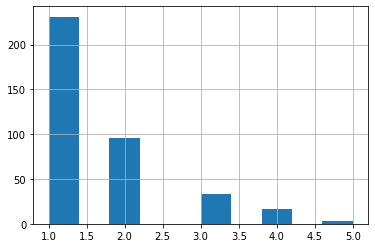

In [250]:
drawdownlist10['Counts'].hist() # consecutive days distribution (makes sense)

<AxesSubplot:>

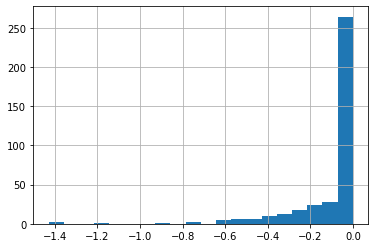

In [254]:
drawdownlist10['PriceDiffInGroup'].hist(bins=20)  # if downturn distribution of how far it will go down.. 

In [263]:
a= drawdownlist10['PriceDiffInGroup'].unique()
a.sort()
a

array([-1.43, -1.4 , -1.18, -0.91, -0.76, -0.76, -0.61, -0.6 , -0.58,
       -0.55, -0.54, -0.53, -0.5 , -0.48, -0.45, -0.44, -0.43, -0.42,
       -0.42, -0.39, -0.39, -0.38, -0.38, -0.37, -0.36, -0.35, -0.34,
       -0.34, -0.33, -0.32, -0.32, -0.31, -0.31, -0.3 , -0.3 , -0.29,
       -0.29, -0.28, -0.27, -0.27, -0.26, -0.26, -0.25, -0.24, -0.23,
       -0.23, -0.23, -0.22, -0.21, -0.21, -0.2 , -0.2 , -0.19, -0.19,
       -0.18, -0.17, -0.17, -0.17, -0.16, -0.15, -0.14, -0.14, -0.13,
       -0.12, -0.11, -0.11, -0.1 , -0.1 , -0.09, -0.08, -0.07, -0.06,
       -0.05, -0.05, -0.04, -0.04, -0.03, -0.03, -0.03, -0.02, -0.02,
       -0.01, -0.01,  0.  ])

In [267]:
# Get count of times the pice diff from start of downturn to end is less than -0.1 
drawdownlist10[drawdownlist10["PriceDiffInGroup"] < -0.1].count() # 103 rows


Date                           103
Volume                         103
Pct_Change                     103
PriceDiffInGroup               103
PctChangeDiffInGroup           103
Beginning_of_Drawdown          103
End_of_Drawdown                103
Close_Beginning_of_Drawdown    103
Close_End_of_Drawdown          103
Open_Beginning_of_Drawdown     103
Open_End_of_Drawdown           103
Counts                         103
dtype: int64

In [270]:
drawdownlist10[drawdownlist10["PriceDiffInGroup"] < -0.1] # The days with the most volitile price movements 

,Date,Volume,Pct_Change,PriceDiffInGroup,PctChangeDiffInGroup,Beginning_of_Drawdown,End_of_Drawdown,Close_Beginning_of_Drawdown,Close_End_of_Drawdown,Open_Beginning_of_Drawdown,Open_End_of_Drawdown,Counts
Newkey,,,,,,,,,,,,
4,2012-01-27,142155259,-0.010828,-0.58,-0.034520,2012-01-26,2012-01-27,12.79,12.21,13.03,11.96,2
6,2012-02-10,52507996,-0.003106,-0.44,-0.013528,2012-02-07,2012-02-10,12.88,12.44,12.93,12.52,4
8,2012-02-22,43325932,-0.017255,-0.25,-0.002697,2012-02-21,2012-02-22,12.53,12.28,12.74,12.49,2
11,2012-03-06,57374495,-0.020440,-0.37,-0.009255,2012-03-05,2012-03-06,12.46,12.09,12.67,12.23,2
19,2012-04-10,77373157,-0.020048,-0.43,-0.015140,2012-04-09,2012-04-10,12.22,11.79,12.26,12.19,2
...,...,...,...,...,...,...,...,...,...,...,...,...
371,2016-11-04,38651451,-0.000881,-0.27,0.010192,2016-11-01,2016-11-04,11.61,11.34,11.78,11.31,4
373,2016-11-18,56109928,-0.001658,-0.30,0.008648,2016-11-14,2016-11-18,12.06,11.76,12.27,11.87,5
377,2016-12-14,42820123,-0.003900,-0.29,0.007782,2016-12-12,2016-12-14,12.82,12.53,13.08,12.65,3


False